##**Instructions**

In your own Colab notebook, use the commands presented in the previous sections to plot the following graphs using Seaborn. You will be graded based on whether your Colab notebook can produce exact or near-exact plots and export them.

###**Steps**###

To start, import this .csv file generated from the Pandas DataFrame in the previous assignment. Here is the direct link to this dataset:

https://drive.google.com/uc?export=download&id=1L4aScG_IYBOnCCgtjJ1yLKUhi6n68YGP

In [1]:
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1L4aScG_IYBOnCCgtjJ1yLKUhi6n68YGP')

You may view the file again in the code-block below:

In [2]:
df

,AGE,RACE,SEX,EJF_PER,CREAT,KLEVEL,CHFDUR,CHFETIOL,PREVMI,DIABETES,HYPERTEN,DIGDOSE,CVD,WHF,DIG,HOSP,NHOSP,DEATH,REASON,DIABETES_AND_HYPERTEN
0,77,1,1,12,1.500,3.1,2.0,4.0,1.0,0,1.0,0.25,1,1,0,1,4,1,1.0,0
1,72,1,2,36,1.239,5.1,12.0,1.0,0.0,0,1.0,0.25,1,1,0,1,2,0,Not given,0
2,74,1,1,15,1.466,4.0,288.0,4.0,0.0,0,0.0,0.375,1,1,0,1,5,0,Not given,0
3,69,2,2,45,1.200,4.3,84.0,4.0,1.0,0,0.0,0.25,1,0,0,1,5,0,Not given,0
4,64,1,2,30,1.300,4.3,31.0,1.0,1.0,0,0.0,0.25,0,0,0,0,0,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,64,1,1,16,1.159,4.2,48.0,1.0,1.0,0,0.0,0.25,1,1,0,1,1,0,Not given,0
5981,62,1,1,20,1.398,4.9,2.0,4.0,1.0,0,0.0,0.25,1,1,0,1,2,1,4.0,0
5982,39,1,1,15,1.500,4.0,3.0,2.0,0.0,0,1.0,0.25,0,0,0,0,0,0,Not given,0
5983,56,1,1,29,1.273,4.3,11.0,1.0,1.0,0,1.0,0.25,1,1,0,1,6,1,1.0,0


In [ ]:
# Check the datatype of column 'DIGDOSE', because we need to customize our wanted values of 'DIGDOSE' in later steps
print(df['DIGDOSE'].dtype)

object


Use the Seaborn library to replicate the following graphs and export them.

In [ ]:
# Check the datatype of column 'DIGDOSE', because we need to customize our wanted values of 'DIGDOSE' in later steps
print(df['DIGDOSE'].dtype)

object


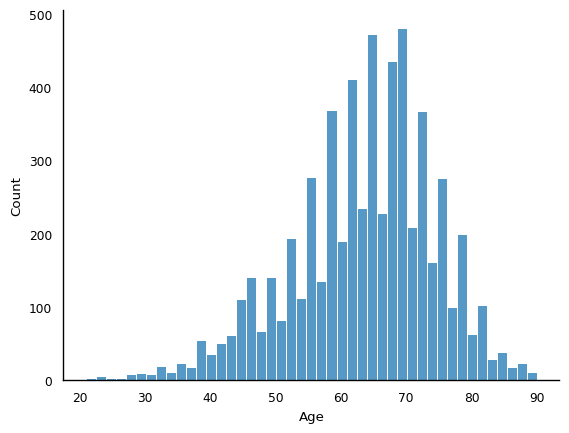

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# In this figure, we want histogram, histogram is about single-variable, thus we will only include the x-axis
sns.set_context("paper")
ax_histogram= sns.histplot(data=df, x='AGE', edgecolor='white')
# Remove the unwanted margin
ax_histogram.spines['right'].set_visible(False)
ax_histogram.spines['top'].set_visible(False)
# Remove the tick marks but keep the labels
ax_histogram.tick_params(bottom=False,left=False)
# Rename the x-axis
ax_histogram.set(xlabel ='Age')
# Export figure
plt.savefig("/content/sample_data/samassignment3-histogram.pdf", bbox_inches='tight')

<ipython-input-7-0db997aeb352>:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax=sns.stripplot(data=df, x= 'DIGDOSE', y='NHOSP', alpha=.5, jitter=.2, zorder=0, order=wanted_dose, palette='colorblind')


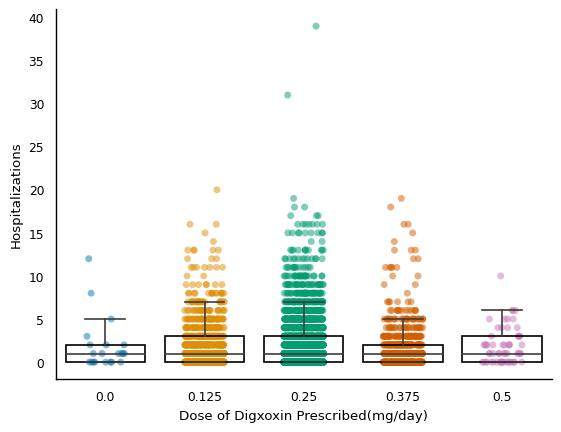

In [ ]:
sns.set_context("paper")
# According to the previous code, we know that the datatype of 'DIGDOSE' is object, thus, here we use the singel quotation to quote each dose that we want:
wanted_dose=['0.0','0.125','0.25','0.375','0.5']
# Draw a boxplot, the x-axis of which is 'DIGDOSE', the y-axis of which is 'NHOSP'. We do not want outliers points. Also, the boxplot should be placed above the stripplot.
ax=sns.boxplot(data=df, x= 'DIGDOSE', y='NHOSP', fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5, order=wanted_dose)
# Draw a stripplot, and set colors for datapoints
ax=sns.stripplot(data=df, x= 'DIGDOSE', y='NHOSP', alpha=.5, jitter=.2, zorder=0, order=wanted_dose, palette='colorblind')
# Change the name of x-axis and y-axis to make it more clear
ax.set(xlabel='Dose of Digxoxin Prescribed(mg/day)', ylabel='Hospitalizations')
# Remove unwanted margin
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Remove the tick marks but keep the labels
ax.tick_params(bottom=False,left=False)
# Export figure
plt.savefig("/content/sample_data/assignment3-combined_plot.pdf", bbox_inches='tight')

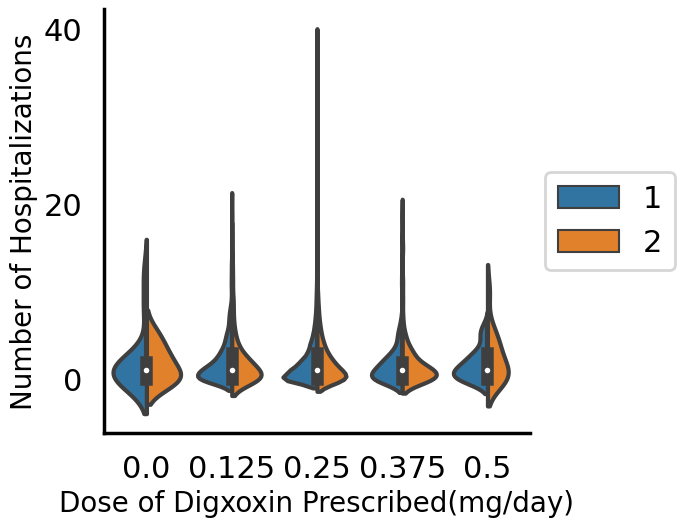

In [ ]:
import numpy as np
sns.set_context("poster")
# Set the figure size
plt.figure(figsize=(5.5, 5.5))
ax2=sns.violinplot(data=df, x='DIGDOSE', y='NHOSP', hue='SEX',split='True', order=wanted_dose)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Change the name of x-axis and y-axis to make it more clear, and set up the size of lables
plt.xlabel(xlabel='Dose of Digxoxin Prescribed(mg/day)', fontsize=20)
plt.ylabel(ylabel='Number of Hospitalizations', fontsize=20)
# Remove unwanted margin
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
# Change the tick label on the y-axis
ax2.set_yticks([0, 20, 40])
# Remove the tick marks but keep the labels
ax2.tick_params(bottom=False,left=False)
sns.despine()
# Export figure
plt.savefig("/content/sample_data/poster_plot.pdf", bbox_inches='tight')